<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [7]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **(Urclass Quiz) 타겟과 상관관계가 가장 높은 특성의 이름을 제출하세요.**

In [20]:
# 상관계수 확인

df_cor = df.corr(method='pearson').sort_values(by='price', ascending = False)

df_cor['price']

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **(Urclass Quiz) 기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

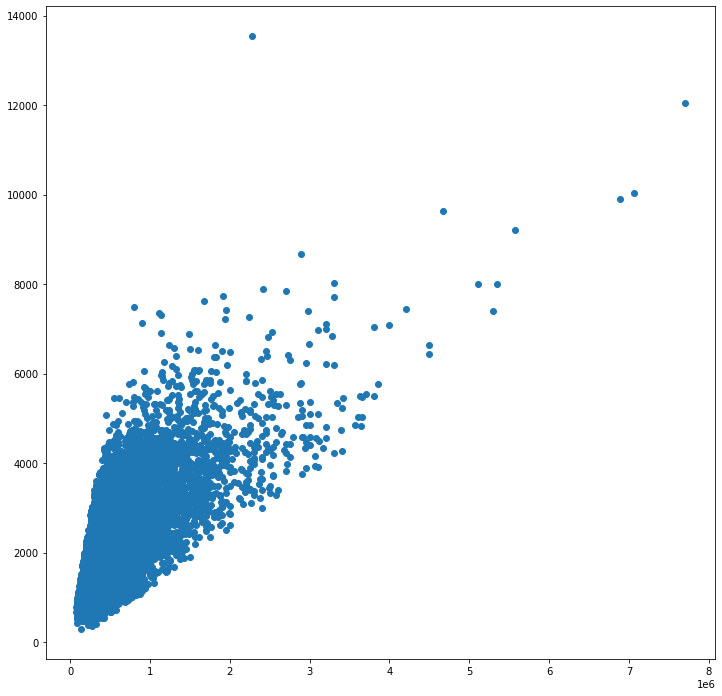

In [24]:
# scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.scatter(df['price'],df['sqft_living'])
plt.show()

In [26]:
# 평균으로 예측하는 기준모델
predict = df['price'].mean()

# 샘플 별 평균값과의 차이
errors = predict - df['price']

print('errors:\n', errors)

# MAE
MAE = errors.abs().mean()

errors:
 0        318188.141767
1          2088.141767
2        360088.141767
3        -63911.858233
4         30088.141767
             ...      
21608    180088.141767
21609    140088.141767
21610    137987.141767
21611    140088.141767
21612    215088.141767
Name: price, Length: 21613, dtype: float64


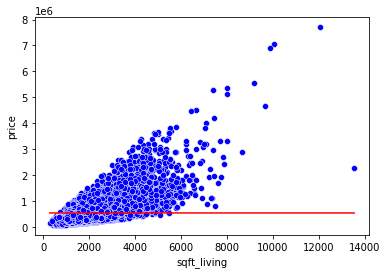

In [31]:
# 기준모델 그리기
import seaborn as sns

#plt.figure(figsize = (12,12))
sns.lineplot(x = df['sqft_living'], y = predict, color = 'red')
sns.scatterplot(x = df['sqft_living'], y = df['price'], color = 'blue');

In [48]:
# 예측값과 MAE
print('Predict:', round(predict,0))
print('\nMAE:', round(MAE,0))

Predict: 540088.0

MAE: 233942.0


### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **(Urclass Quiz) sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 종속변수 X와 독립변수 y를 설정
feature = ['sqft_living']
target = ['price']

X_train = df[feature]
y_train = df[target]

# X_train = df['sqft_living']
# y_train = df['price']   ----> 이렇게만 하면 왜 에러가 생길까?

# 모델 학습 및 예측
model.fit(X_train.values,y_train.values)

X_test = [[15000]]
y_pred = model.predict(X_test)

print('predicted price:', round(y_pred[0][0],0))

predicted price: 4165773.0


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **(Urclass Quiz) sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [49]:
# 전체 테스트 데이터의 모델을 통한 예측
X_test = [[x] for x in df['sqft_living']]
y_pred = model.predict(X_test)

y_pred

array([[287555.06702451],
       [677621.82640197],
       [172499.40418656],
       ...,
       [242655.29616092],
       [405416.96554144],
       [242655.29616092]])

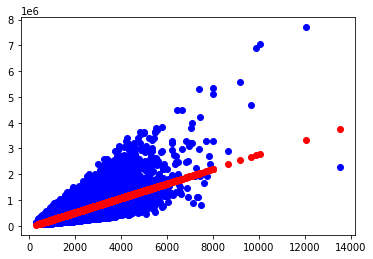

In [53]:
# 그래프로의 시각화

plt.scatter(X_train, y_train, color='blue', linewidth=1)
plt.scatter(X_test, y_pred, color='red',linewidth=1);

In [58]:
# 계수(coefficient)와 절편(intercept)

print('coefficient:',model.coef_[0][0])
print('intercept:',model.intercept_[0],'\n')

print(f"선형회귀분석에 의해 'sqft_living'이 1단위 증가할 때, 'price'는 {round(model.coef_[0][0],0)} 증가한다.")

coefficient: 280.62356789744825
intercept: -43580.74309447396 

선형회귀분석에 의해 'sqft_living'이 1단위 증가할 때, 'price'는 281.0 증가한다.


In [71]:
# ipywidgets 추가해보기
from ipywidgets import interact

print('Min: ',df['sqft_living'].min())
print('Max: ',df['sqft_living'].max(),'\n')

@interact
def explain_pred(sqft=(290,13540)):
  y_pred = model.predict([[sqft]])
  pred = f'입력값이 {int(sqft)} 일때, 예측값은 {int(y_pred[0][0])} (상관계수: {int(model.coef_[0][0])})'
  return pred


Min:  290
Max:  13540 



interactive(children=(IntSlider(value=6915, description='sqft', max=13540, min=290), Output()), _dom_classes=(…

### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **(Urclass Quiz) bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [81]:
model_b = LinearRegression()

# 종속변수 X와 독립변수 y를 설정
print('Min: ',df['bathrooms'].min())
print('Max: ',df['bathrooms'].max(),'\n')

feature_b = ['bathrooms']
target_b = ['price']

X_train_b = df[feature_b]
y_train_b = df[target_b]


# 모델 학습 및 예측
model_b.fit(X_train_b.values,y_train_b.values)

X_test_b = [[5]]
y_pred_b = model_b.predict(X_test_b)

print('predicted price:', round(y_pred_b[0][0],0))


Min:  0.0
Max:  8.0 

predicted price: 1262341.0


In [82]:
# 전체 테스트 데이터의 모델을 통한 예측
X_test_b = [[x] for x in df['bathrooms']]
y_pred_b = model_b.predict(X_test_b)

y_pred_b

array([[261034.82483248],
       [573942.97021011],
       [261034.82483248],
       ...,
       [198453.19575695],
       [636524.59928563],
       [198453.19575695]])

In [84]:
# 계수(coefficient)와 절편(intercept)

print('coefficient:',model_b.coef_[0][0])
print('intercept:',model_b.intercept_[0],'\n')

print(f"선형회귀분석에 의해 'sqft_living'이 1단위 증가할 때, 'price'는 {round(model_b.coef_[0][0],0)} 증가한다.")

coefficient: 250326.51630210335
intercept: 10708.308530374663 

선형회귀분석에 의해 'sqft_living'이 1단위 증가할 때, 'price'는 250327.0 증가한다.


## 🔥도전과제 (Github - Discussion) 

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위해 전제되어야 하는 조건들에 대해 찾아보시고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.